In [1]:
import pickle
from pathlib import Path
from PIL import Image
import numpy as np
# Notebook widget for interactive exploration
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2 as cv
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from dotenv import load_dotenv, find_dotenv

# Load the .ENV path. 
load_dotenv(find_dotenv())

# Get Env variable on the pathing. 
import os
PATH_DATA_INTERIM=os.getenv("PATH_DATA_INTERIM")
PATH_DATA_RAW=os.getenv("PATH_DATA_RAW")

In [3]:
ROOT_FOLDER = 'C:/Users/nasty/data-science/kaggle/bengali/data/'


In [5]:
import pickle
from pathlib import Path

# Load the labeling data for decoding purpose
import pandas as pd
grapheme_train = pd.read_csv('C:/Users/nasty/data-science/kaggle/bengali/data/raw/' + "train.csv")
grapheme_train

# Load the data, ~5GB
with open('C:/Users/nasty/data-science/kaggle/bengali/data/interim/' + 'train_data.p', 'rb') as pickle_file:
    data_train = pickle.load(pickle_file)

# Load the validation data, about 1.3GB
with open('C:/Users/nasty/data-science/kaggle/bengali/data/interim/' + "val_data.p", 'rb') as pickle_file:
    data_val = pickle.load(pickle_file)
    
    # Load the validation data, about 1.3GB
with open('C:/Users/nasty/data-science/kaggle/bengali/data/interim/' + "test_data.p", 'rb') as pickle_file:
    data_test = pickle.load(pickle_file)

In [6]:
len(data_test)

12

In [7]:
data_train

[(array([[241, 234, 244, ..., 243, 248, 248],
         [252, 252, 252, ..., 248, 245, 247],
         [247, 248, 250, ..., 251, 248, 252],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([89,  1,  5], dtype=int64)),
 (array([[250, 249, 250, ..., 252, 251, 253],
         [248, 248, 248, ..., 253, 253, 254],
         [249, 251, 250, ..., 254, 254, 254],
         ...,
         [254, 254, 254, ..., 254, 253, 253],
         [248, 252, 250, ..., 254, 253, 253],
         [247, 245, 250, ..., 254, 254, 253]], dtype=uint8),
  array([125,   0,   0], dtype=int64)),
 (array([[249, 251, 250, ..., 249, 249, 248],
         [251, 251, 251, ..., 250, 248, 249],
         [252, 252, 252, ..., 250, 249, 250],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array(

In [ ]:
# Check its length
len(data_train)

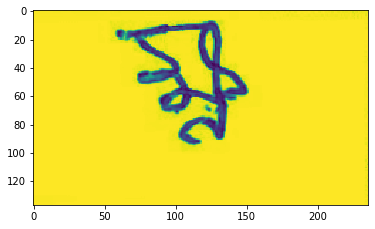

In [14]:


plt.imshow(data_test[2])

In [ ]:
type(data_train[0])

In [ ]:
# Check a tuple
data_train[0]

In [ ]:
# Check its inside tuple
data_train[0][0]

In [ ]:
# Check its shape
data_train[0][0].shape

In [ ]:
# Check its classification
data_train[0][1]

In [28]:
# Dual showing the images: training on the left and validation on the right. 
@interact
def show_image(index_train=(0,len(data_train)-1,1), index_val=(0,len(data_test)-1,1)):
    
    # Load the training image index    
    img_train = Image.fromarray(data_train[index_train][0], "L")
    
    # Load the validation image index
    img_val = Image.fromarray(data_train[index_val][0], "L")

    # Compose into the composite array laytout
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img_train, cmap='gray')
    axarr[0].set_title("Training Set")
    axarr[1].imshow(img_val, cmap='gray')    
    axarr[1].set_title("Validation Set")
    f.set_size_inches(18.5, 10.5)
    f.suptitle("Raw Grapheme Images", fontsize=40)
    
    # Get the classification from the label
    a, b, c = tuple(data_train[index_train][1])
    # Look up the entries that have the same classifications.     
    d = grapheme_train[grapheme_train.grapheme_root.eq(a) & grapheme_train.vowel_diacritic.eq(b) & grapheme_train.consonant_diacritic.eq(c)] 
    # Show the first one and its grapheme (since they all should have the same grapheme)
    from IPython.display import display, Markdown
    display(Markdown('<h1>{}</h1>'.format(f"Character{d.iloc[0].grapheme}")))
    #print(f"Character{d.iloc[0].grapheme}")
    

interactive(children=(IntSlider(value=80335, description='index_train', max=160671), IntSlider(value=5, descri…